## Dataset: beer_foam.csv

Source: J.J. Hackbarth (2006). "Multivariate Analyses of Beer Foam Stand,"
Journal of the Institute of Brewing, Vol. 112, #1, pp. 17-24


Description: Measurements of wet foam height and beer height at various
time points for Shiner Bock at 20C. Author fits exponential decay model:
H(t) = H(0)*exp(-lambda*t)


Variables/Columns

TIME: Time from pour (seconds)  4-8

FOAM: Wet foam height (cm)  10-16

BEER: Beer height (cm)    18-24

**Hypothesis**: Can we predict the time from pour using the measurements of foam height and beer height?

---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Read the csv file into a pandas Dataframe

foam = pd.read_csv('Data/foam.csv')
foam[:5].T

,0,1,2,3,4
time,0.0,15.0,30.0,45.00,60.0
foam,17.4,15.1,13.1,11.60,10.6
beer,0.6,2.2,3.4,4.15,4.5


In [9]:
foam.describe().T

,count,mean,std,min,25%,50%,75%,max
time,13.0,131.538462,101.578882,0.0,45.00,120.0,210.00,300.0
foam,13.0,8.473077,4.742653,2.9,4.50,7.4,11.60,17.4
beer,13.0,4.777692,1.778638,0.6,4.15,5.5,6.15,6.3


In [11]:
foam.corr()

,time,foam,beer
time,1.000000,-0.951033,0.850803
foam,-0.951033,1.000000,-0.969220
beer,0.850803,-0.969220,1.000000


In [6]:
# Assign the data to X and y

X = foam.drop('time', axis=1)
y = foam['time']

In [12]:
print(X.shape,y.shape)

(13, 2) (13,)


In [13]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [14]:
# Create the model using LinearRegression

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [15]:
# Fit the model to the training data and calculate the scores for the training and testing data

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')

Training Score: 0.9907390608835367
Testing Score: 0.940081803648188


Text(0.5,1,'Residual Plot')

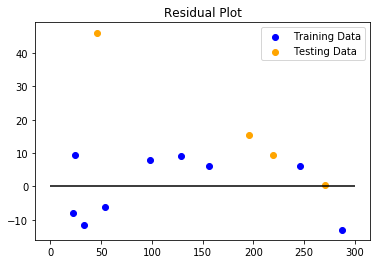

In [16]:
# Plot the Residuals for the training and testing data

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")